In [61]:
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn import datasets

# from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline

In [72]:
# dat = pd.read_csv('c:\\users\\lauaa\\envs\\mlbase\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv')
dat = datasets.load_iris()

In [74]:
data = pd.DataFrame(dat['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
target = pd.Series(dat['target'])
# target = pd.DataFrame(dat['target'], columns=['target'])

In [75]:
del(dat)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001669CFDD7F0>,
      dtype=object)

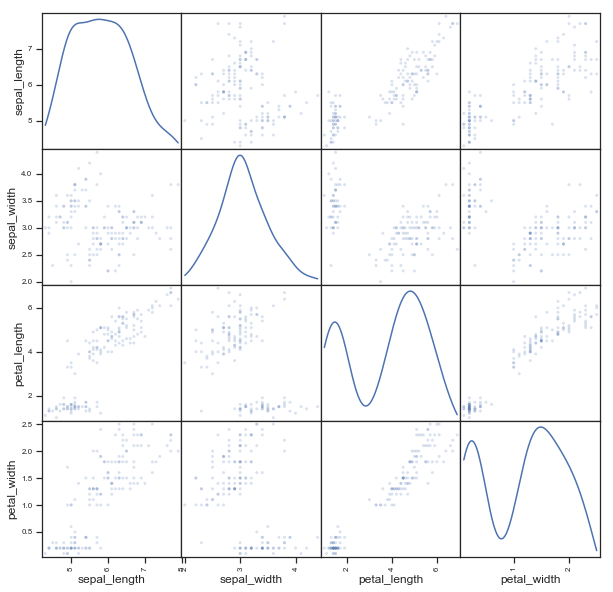

In [76]:
scatter_matrix(data, 
               alpha = 0.2, 
               figsize = (10, 10), 
               diagonal = 'kde')

In [19]:
concat_iris = pd.concat([data, target], axis=1)
concat_iris['target'] = concat_iris['target'].astype('category')

In [20]:
target_remap = {0: 'setosa',
                1: 'versicolour',
                2: 'virginica',
               }
concat_iris['target'] = concat_iris['target'].replace(target_remap)

concat_iris

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [91]:
target = target.replace(target_remap)

In [92]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

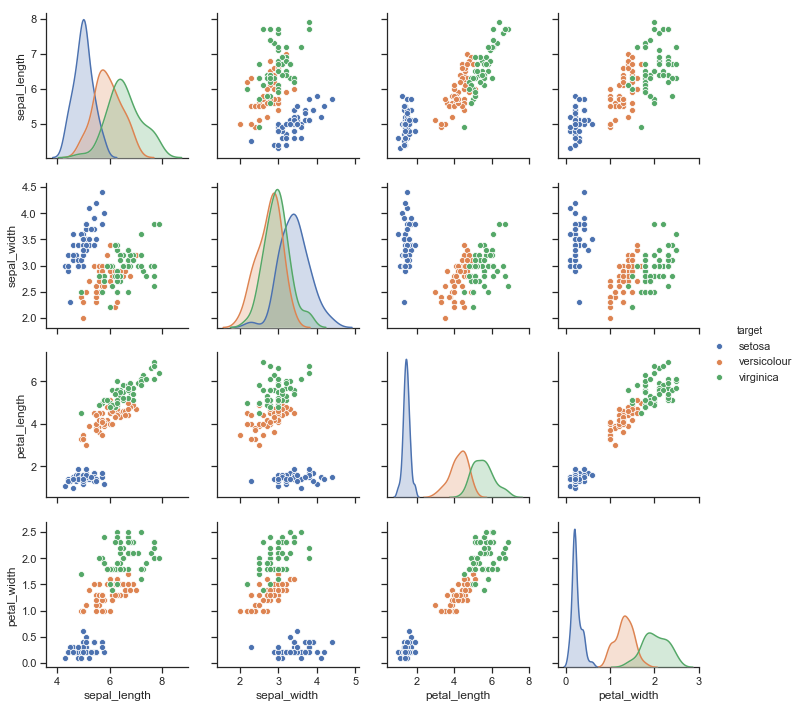

In [21]:
import seaborn as sns
sns.set(style="ticks")

# sns.pairplot(pd.concat([data, df['species']], axis=1), hue="species", kind='scatter')
sns.pairplot(concat_iris, hue="target")
# sns.pairplot(data)

In [24]:
concat_iris.shape

(150, 5)

In [23]:
concat_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [32]:
concat_iris.iloc[:, 4]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

# Classifier

## Test train split

In [93]:
# X_train, X_test, y_train, y_test = train_test_split(concat_iris.iloc[:, :4], concat_iris.iloc[:, 4], test_size=0.4, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)

In [94]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [95]:
X_test.shape, y_test.shape

((60, 4), (60,))

In [96]:
clf = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

In [97]:
clf.score(X_test, y_test)

0.9666666666666667

In [99]:
clf.predict([[5.1, 3.5, 1.4, 0.2]])

array(['setosa'], dtype=object)

In [98]:
clf.predict_proba([[5.1, 3.5, 1.4, 0.2]])

array([[0.96315466, 0.0233283 , 0.01351704]])

# Pickle the model

In [ ]:
import pickle

## Crossval Score

In [40]:
clf = svm.SVC(kernel='linear', C=1)

In [41]:
scores = cross_val_score(clf, concat_iris.iloc[:, :4], concat_iris.iloc[:, 4], cv=5)

In [42]:
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [43]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


## Preprocess and Pipeline

In [48]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))

In [49]:
scores = cross_val_score(clf, concat_iris.iloc[:, :4], concat_iris.iloc[:, 4], cv=5)

In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.04)


## Cross Validate Function

In [51]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [53]:
scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, concat_iris.iloc[:, :4], concat_iris.iloc[:, 4], scoring=scoring, cv=5, return_train_score=False)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [54]:
scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [55]:
from sklearn.metrics.scorer import make_scorer

In [56]:
scoring = {'prec_macro': 'precision_macro', 'rec_micro': make_scorer(recall_score, average='macro')}

In [58]:
scores = cross_validate(clf, concat_iris.iloc[:, :4], concat_iris.iloc[:, 4], scoring=scoring, cv=5, return_train_score=True)

In [59]:
sorted(scores.keys()) 

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_micro',
 'train_prec_macro',
 'train_rec_micro']

In [60]:
scores['train_rec_micro']

array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])